In [3]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
!pip install --upgrade tensorflow_hub


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

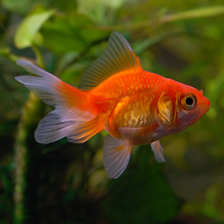

In [5]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [6]:
gold_fish = np.array(gold_fish) / 255.0
gold_fish.shape

(224, 224, 3)

In [7]:
gold_fish[np.newaxis, ...].shape # I add 1 more dimension

(1, 224, 224, 3)

In [8]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 610ms/step


(1, 1001)

In [9]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [11]:
dataset_url_1 ="https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"
data_dir = tf.keras.utils.get_file('ImageNetLabels.txt', origin = dataset_url_1, cache_dir = '.' )


10484/10484 [==============================] - 0s 0us/step


In [12]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

["{0: 'tench, Tinca tinca',",
 " 1: 'goldfish, Carassius auratus',",
 " 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',",
 " 3: 'tiger shark, Galeocerdo cuvieri',",
 " 4: 'hammerhead, hammerhead shark',"]

In [13]:
image_labels[predicted_label_index]

" 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',"

In [19]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [15]:
data_dir 

'./datasets/folwer_photos'

In [20]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [21]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/4895718876_0246882882_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5139971615_434ff8ed8b_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/7652532108_01ef94c476.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6042014768_b57f0bfc79_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/2949654221_909b0c86a1_n.jpg')]

In [22]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [23]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/1645761726_2b1be95472.jpg'),
 PosixPath('datasets/flower_photos/roses/3231873181_faf2da6382.jpg'),
 PosixPath('datasets/flower_photos/roses/1831404161_d2df86fd70.jpg'),
 PosixPath('datasets/flower_photos/roses/14414100710_753a36fce9.jpg'),
 PosixPath('datasets/flower_photos/roses/319298955_0c72bd36bf.jpg')]

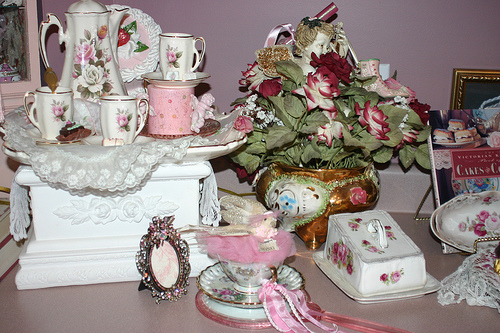

In [25]:
Image.open(str(roses[1]))

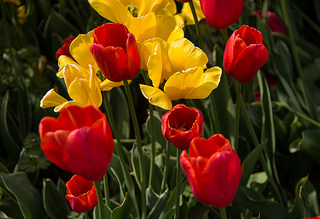

In [26]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(tulips[1])

In [28]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflower': list(data_dir.glob('sunflower/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [29]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflower': 3,
    'tulips': 4
}

In [33]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/1645761726_2b1be95472.jpg'

In [35]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(333, 500, 3)

In [37]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [38]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(224,224))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])


In [39]:
X = np.array(X)
y = np.array(y)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [44]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [45]:
X[0].shape

(224, 224, 3)

In [47]:
X_0_resized = cv2.resize(X[0], IMAGE_SHAPE)
X_1_resized = cv2.resize(X[1], IMAGE_SHAPE)
X_2_resized = cv2.resize(X[2], IMAGE_SHAPE)

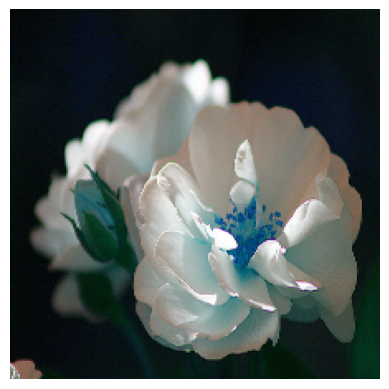

In [48]:
plt.axis('off')
plt.imshow(X[0])

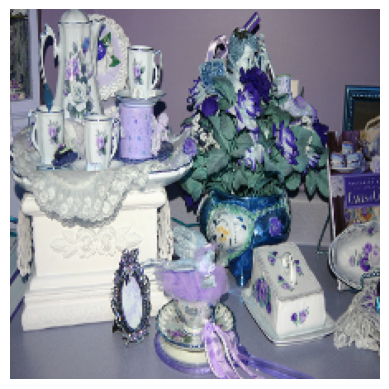

In [49]:
plt.axis('off')
plt.imshow(X[1])

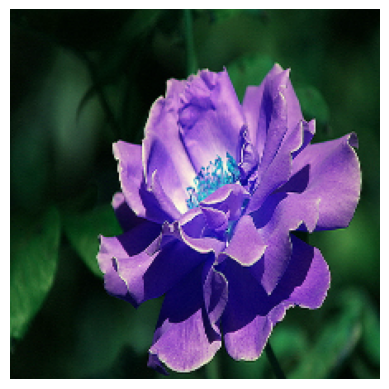

In [50]:
plt.axis('off')
plt.imshow(X[2])

In [52]:
predicted = classifier.predict(np.array([X_0_resized, X_1_resized, X_2_resized]))
predicted = np.argmax(predicted, axis = 1)
predicted

1/1 [==============================] - 0s 103ms/step


array([795, 795, 795])

In [53]:
image_labels[795]

" 795: 'ski',"

In [55]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3), trainable = False) # trainable mean "Freeze" do not train


In [57]:
num_of_flowers = 5

model = tf.keras.Sequential([
    pretrained_model_without_top_layer, # I put pretrained_model it is already trained model
    tf.keras.layers.Dense(num_of_flowers) # And I put my last layer
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [58]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)
model.fit(X_train_scaled, y_train, epochs = 5) # I need only five epochs to get nice accuracy

Epoch 1/5
75/75 [==============================] - 101s 1s/step - loss: 0.6737 - accuracy: 0.7458
Epoch 2/5
75/75 [==============================] - 88s 1s/step - loss: 0.3346 - accuracy: 0.8784
Epoch 3/5
75/75 [==============================] - 91s 1s/step - loss: 0.2635 - accuracy: 0.9120
Epoch 4/5
75/75 [==============================] - 95s 1s/step - loss: 0.2286 - accuracy: 0.9209
Epoch 5/5
75/75 [==============================] - 101s 1s/step - loss: 0.1949 - accuracy: 0.9373


In [59]:
model.evaluate(X_test_scaled, y_test)

19/19 [==============================] - 21s 1s/step - loss: 0.2827 - accuracy: 0.8874


[0.2827271521091461, 0.8873949646949768]